# 1D inversion of magnetotelluric data
## Example 1: inversion of synthetic MT data

## 0. Import modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import cofi
from cofi_espresso import Magnetotelluric1D

### Create synthetic data given a simple 3 layers Earth model

In [2]:
mt = Magnetotelluric1D(example_number=1)

#### 0.1. Define a synthetic resistivity model and plot it

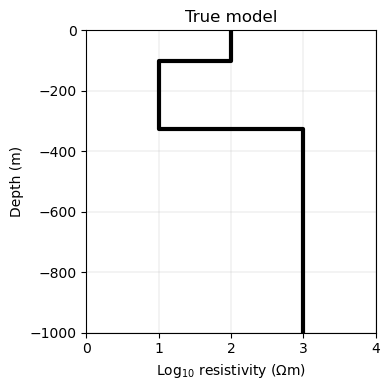

In [3]:
fig = mt.plot_model(mt.good_model, title='True model')

#### 0.2. Load and plot responses of this model (plus added noise)

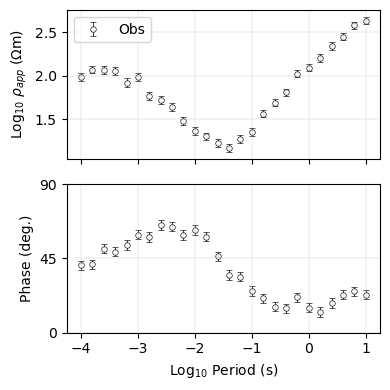

In [4]:
fig = mt.plot_data(mt.data, Cm = mt.covariance_matrix)


## 1. Define the problem

In [5]:
# get problem information from espresso magnetotelluric1D
model_size = mt.model_size         # number of model parameters
data_size = mt.data_size           # number of data points
start_logres = mt.starting_model   # starting model

In [6]:
# define CoFI BaseProblem
mt_problem = cofi.BaseProblem()
mt_problem.set_initial_model(start_logres)

In [7]:
# add regularization: smoothing
smoothing_factor = 10
#reg_smoothing = cofi.utils.QuadraticReg(smoothing_factor, model_size = model_size, reg_type = "roughening")
reg_smoothing = cofi.utils.QuadraticReg(smoothing_factor, model_size = model_size, reg_type = "smoothing")
reg = reg_smoothing
reg.model_size


50

In [8]:
def objective_func(logres, reg):
    dpred = mt.forward(logres)
    data_misfit = mt.misfit(mt.data,dpred,mt.inverse_covariance_matrix)
    model_reg = reg(logres)
    return  data_misfit + model_reg

In [9]:
mt_problem.set_objective(objective_func, args=[reg])

In [10]:
#mt_problem.summary()

## 2. Define the inversion options

In [11]:
#mt_problem.suggest_tools();

In [12]:
my_options = cofi.InversionOptions()
my_options.set_tool("scipy.optimize.minimize")
my_options.set_params(method="L-BFGS-B",options={'ftol':1e-3,'maxiter': 100})

## 3. Start an inversion

In [13]:
inv = cofi.Inversion(mt_problem, my_options)
inv_result = inv.run()
inv_result.summary()

Summary for inversion result
SUCCESS
----------------------------
fun: 39.63871398477803
jac: [-2.34043613  7.21508191 -6.79652889  1.18529685 -0.72093301 -0.43049085
 -1.02531388 -0.87398533 -0.93263637  0.54658571  1.21732385  3.32819001
  8.07622694  6.8374575   8.01736851  4.71539042  4.50266955  2.64021695
  1.00959668  1.56833338  0.68370199  0.02037268  0.40769379  0.51392704
  0.30504452  0.20010944  0.18919053  0.18612596  0.18438655  0.19057325
  0.20436559  0.22197284  0.23829472  0.25111362  0.25489015  0.26108609
  0.29801441  0.26008635  0.16271784  0.4266397  -0.16314203 -2.00168843
 -0.11826984  1.27524729 -1.88393942  0.82001109 -1.41948889 -0.03441798
  0.99906146 -0.28720777]
nfev: 1326
njev: 26
nit: 23
status: 0
message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
hess_inv: <50x50 LbfgsInvHessProduct with dtype=float64>
model: [1.74828303 1.90885546 2.03474988 2.15168561 2.21038532 2.19425213
 2.09161184 1.91802052 1.69571153 1.46210652 1.23763938 1.04435688
 0.

## 4. Plotting results

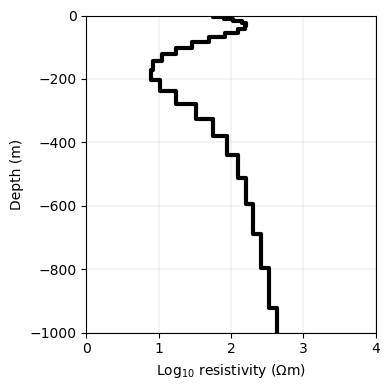

In [14]:
fig = mt.plot_model(inv_result.model);            # inverted model

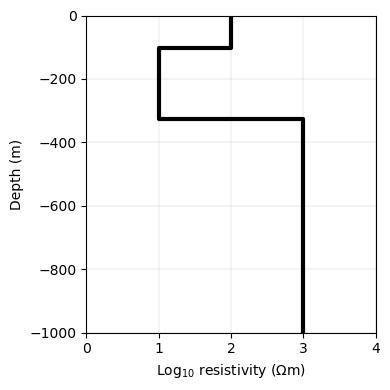

In [15]:
fig = mt.plot_model(mt.good_model);       # true model

nRMSE = 0.862


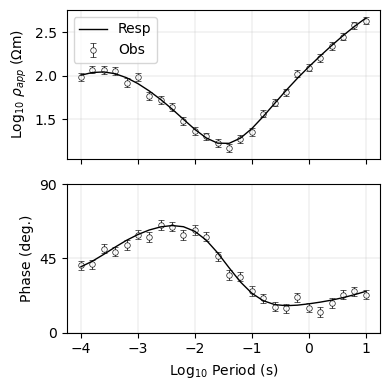

In [16]:
fig = mt.plot_data(mt.data, mt.forward(inv_result.model), Cm = mt.covariance_matrix)
#float(np.sqrt(1/self.data_size * (res.T @ Cm_inv @ res)))
nRMSE = np.sqrt(mt.misfit(mt.data, mt.forward(inv_result.model), Cm_inv = mt.inverse_covariance_matrix)/mt.data_size)
print('nRMSE = %.3f'%nRMSE)